In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv(r"C:\Users\KIIT\Downloads\PCOS_infertility.csv") 
dataset.head(541)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [5]:
dataset.shape[0]

541

In [6]:
dataset.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64

In [7]:
dataset.isnull().sum()/dataset.shape[0]*100


Sl. No                    0.0
Patient File No.          0.0
PCOS (Y/N)                0.0
  I   beta-HCG(mIU/mL)    0.0
II    beta-HCG(mIU/mL)    0.0
AMH(ng/mL)                0.0
dtype: float64

In [8]:
dataset.isnull().sum().sum()

0

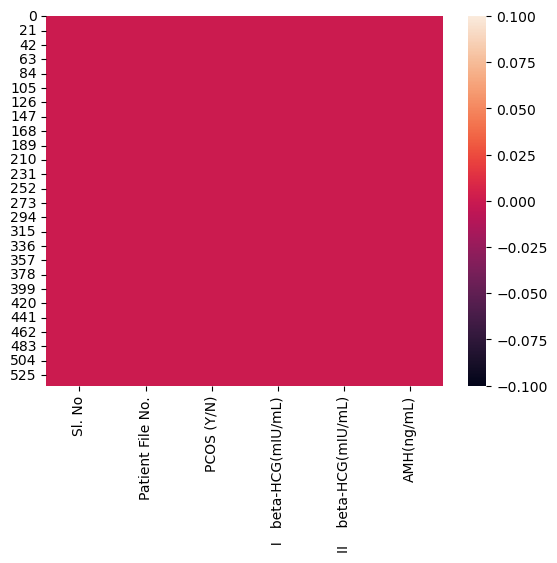

In [9]:
sns.heatmap(dataset.isnull())
plt.show()

In [10]:
dataset .drop_duplicates()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.7
537,538,10538,0,80.13,1.99,5.6
538,539,10539,0,1.99,1.99,3.7
539,540,10540,0,292.92,1.99,5.2


In [11]:
dataset.shape

(541, 6)

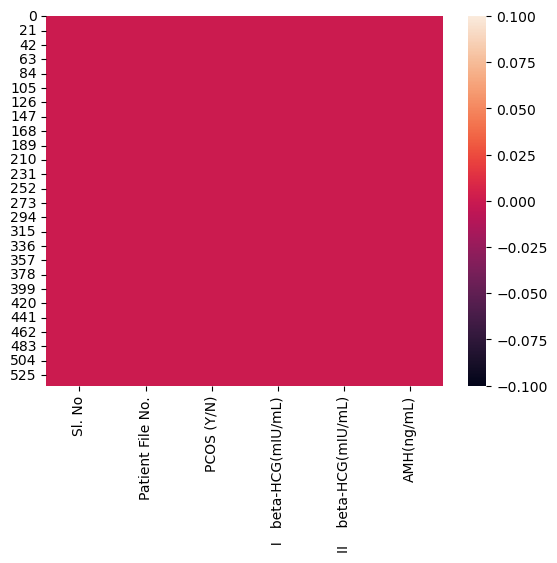

In [12]:
sns.heatmap(dataset.isnull())
plt.show()

In [17]:
X = dataset.drop('PCOS (Y/N)', axis=1)
y = dataset['PCOS (Y/N)']

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
non_numeric_amh = dataset[~dataset['AMH(ng/mL)'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull()]
print("Non-numeric entries in 'AMH(ng/mL)':")
print(non_numeric_amh)

Non-numeric entries in 'AMH(ng/mL)':
     Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
305     306             10306           0                    42.0   

     II    beta-HCG(mIU/mL) AMH(ng/mL)  
305                    1.99          a  


In [21]:
# Convert the 'AMH(ng/mL)' column to numeric, coercing errors to NaN
dataset['AMH(ng/mL)'] = pd.to_numeric(dataset['AMH(ng/mL)'], errors='coerce')


In [22]:
dataset = dataset.dropna(subset=['AMH(ng/mL)'])

In [23]:
# Selecting features (excluding target variable 'PCOS (Y/N)' and other non-numeric columns if any)
features = dataset.drop(columns=['Sl. No', 'Patient File No.', 'PCOS (Y/N)'])


In [24]:
# Initialize the scaler
scaler = StandardScaler()

In [25]:
# Fit and transform the features
scaled_features = scaler.fit_transform(features)


In [26]:
# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)


In [34]:
# Handle any remaining infinite values in the scaled data
scaled_features_df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
scaled_features_df.dropna(inplace=True)


In [36]:
# Add the target variable back to the DataFrame
scaled_data = pd.concat([scaled_features_df, dataset['PCOS (Y/N)'].reset_index(drop=True)], axis=1)


In [44]:
# Display the first few rows of the scaled dataset
print("Scaled data:")
print(scaled_data.head())


Scaled data:
     I   beta-HCG(mIU/mL)  II    beta-HCG(mIU/mL)  AMH(ng/mL)  PCOS (Y/N)
0               -0.198193               -0.147573   -0.604849           0
1               -0.180632               -0.147573   -0.696746           0
2               -0.051249                0.159255    0.171168           1
3               -0.198193               -0.147573   -0.749502           0
4                0.040536                0.350907   -0.572515           0


In [45]:
# Plot histograms of original and scaled features
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

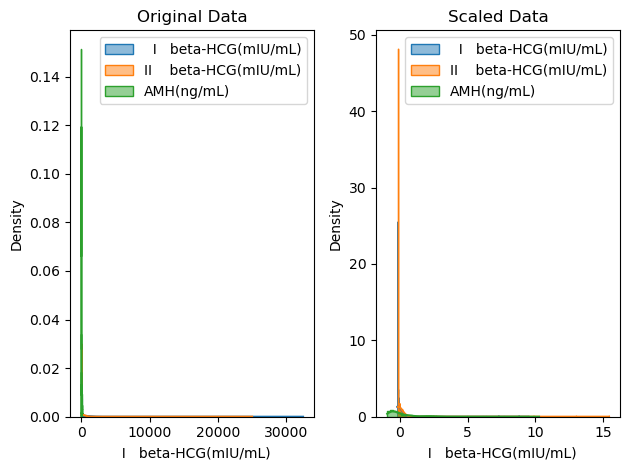

In [48]:
plt.subplot(1, 2, 1)
plt.title("Original Data")
for column in features.columns:
    sns.histplot(dataset[column], kde=True, label=column, element="step", stat="density", common_norm=False)
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Scaled Data")
for column in scaled_features_df.columns:
    sns.histplot(scaled_features_df[column], kde=True, label=column, element="step", stat="density", common_norm=False)
plt.legend()

plt.tight_layout()
plt.show()

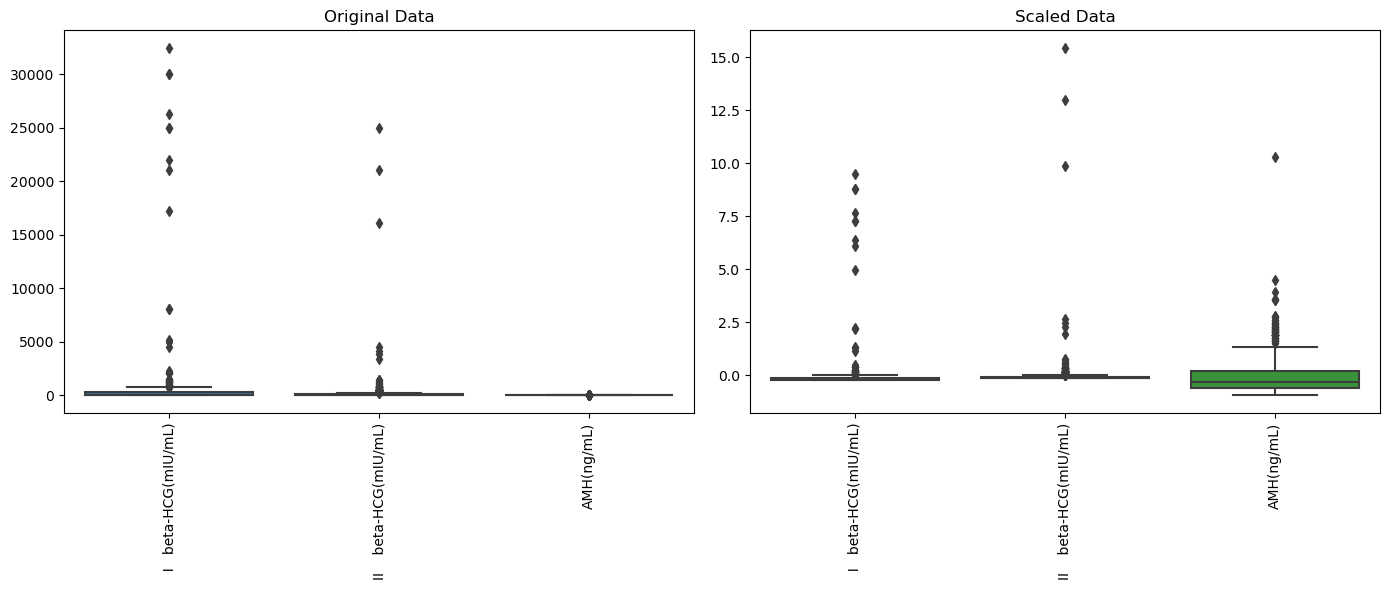

In [49]:
# Plot box plots of original and scaled features
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title("Original Data")
sns.boxplot(data=features)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.title("Scaled Data")
sns.boxplot(data=scaled_features_df)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [52]:
# Selecting features and target variable
features = dataset.drop(columns=['Sl. No', 'Patient File No.', 'PCOS (Y/N)'])
target = dataset['PCOS (Y/N)']


In [53]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)


In [55]:
# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [56]:
# Train, predict and evaluate each classifier
results = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

In [59]:
# Convert the results to a DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

               Classifier  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.703704   0.555556  0.151515  0.238095
1           Decision Tree  0.574074   0.303030  0.303030  0.303030
2           Random Forest  0.638889   0.384615  0.303030  0.338983
3       Gradient Boosting  0.648148   0.380952  0.242424  0.296296
4                AdaBoost  0.648148   0.352941  0.181818  0.240000
5             Naive Bayes  0.703704   0.538462  0.212121  0.304348
6  Support Vector Machine  0.685185   0.428571  0.090909  0.150000
7     K-Nearest Neighbors  0.648148   0.333333  0.151515  0.208333


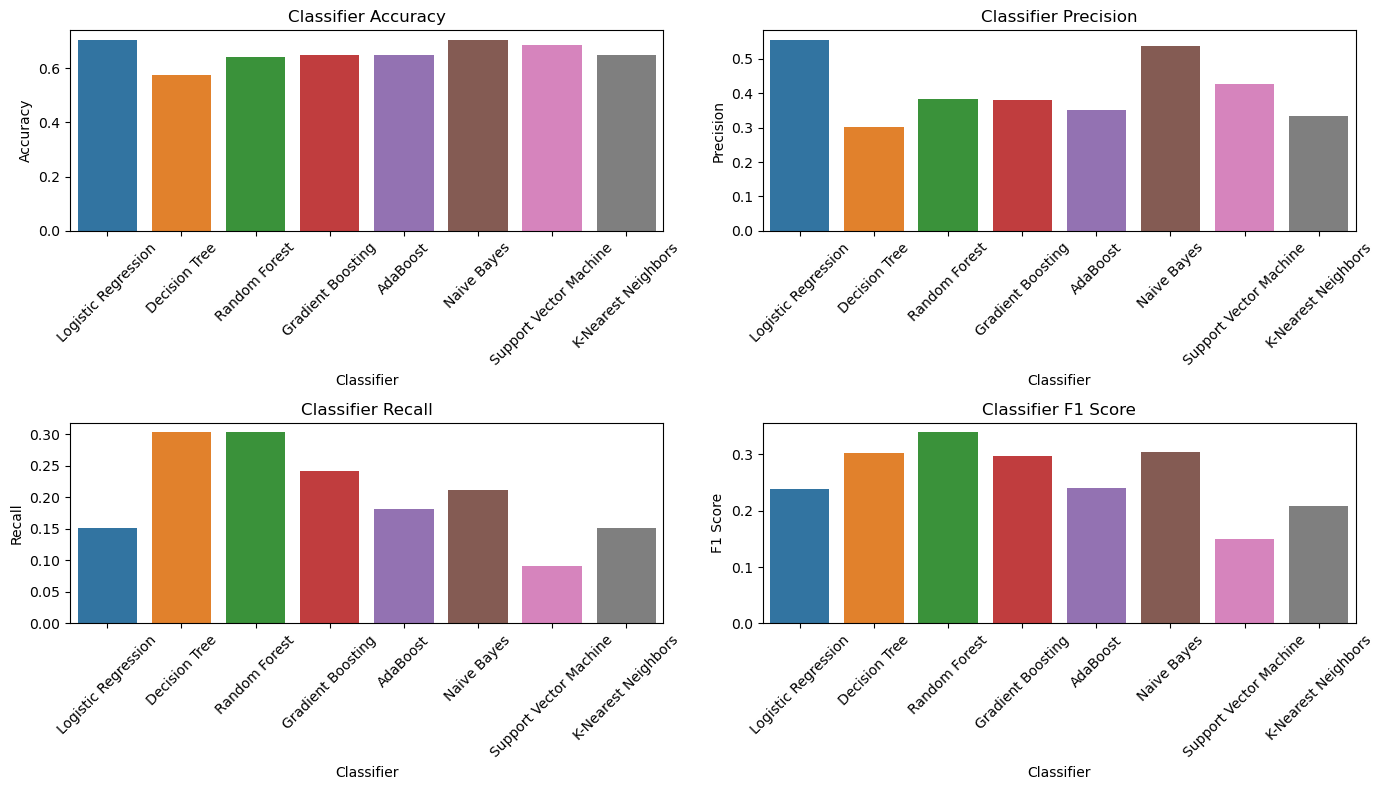

In [61]:
# Plot the performance metrics
plt.figure(figsize=(14, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Classifier', y=metric, data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'Classifier {metric}')

plt.tight_layout()
plt.show()


In [63]:
features = dataset.drop(columns=['Sl. No', 'Patient File No.', 'PCOS (Y/N)'])
target = dataset['PCOS (Y/N)']


In [64]:
# Combine features and target for correlation analysis
data_for_corr = pd.concat([features, target], axis=1)


In [65]:
# Compute the correlation matrix
corr_matrix = data_for_corr.corr()


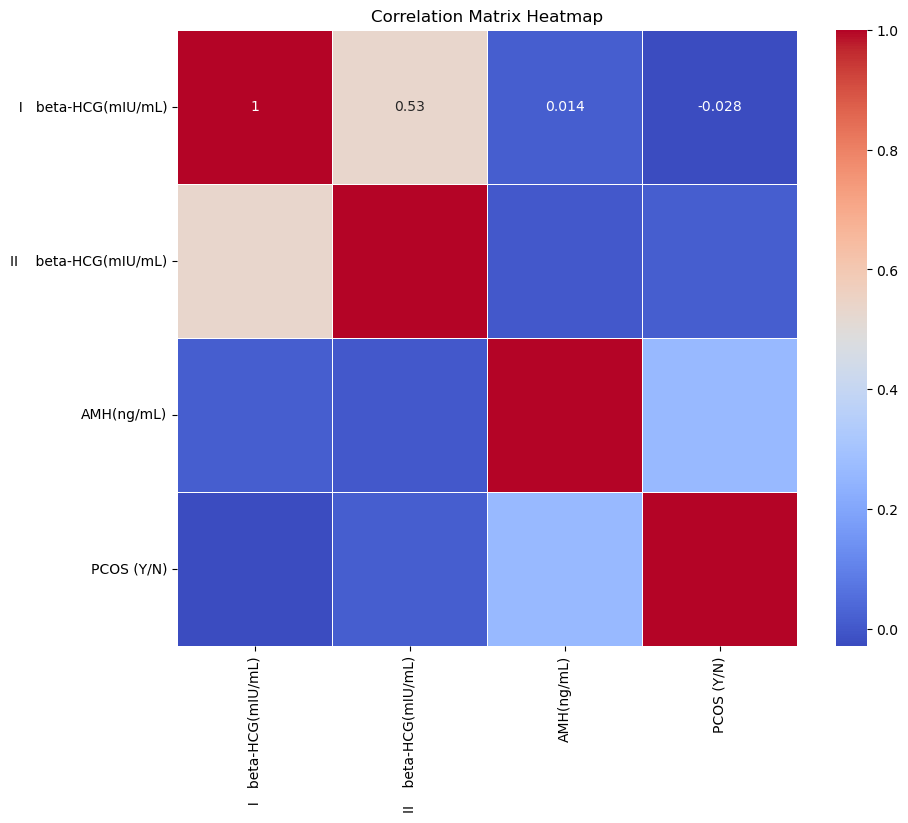

In [66]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
# Separate features and target variable
X = dataset.drop(columns=['PCOS (Y/N)'])
y = dataset['PCOS (Y/N)']

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [126]:
# Prepare a list to store the results
results = []


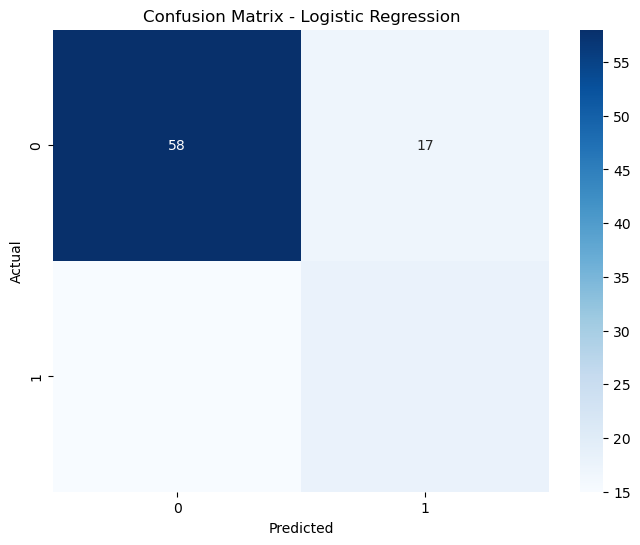

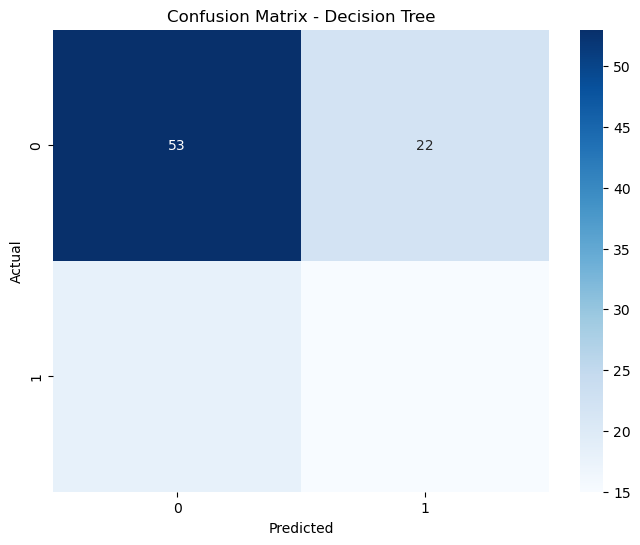

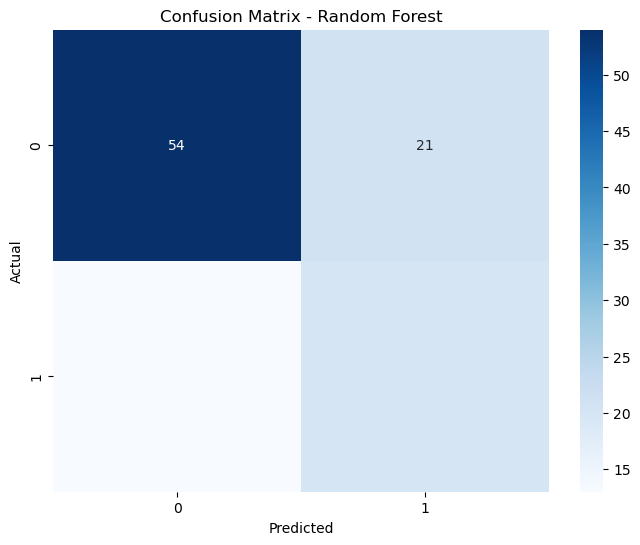

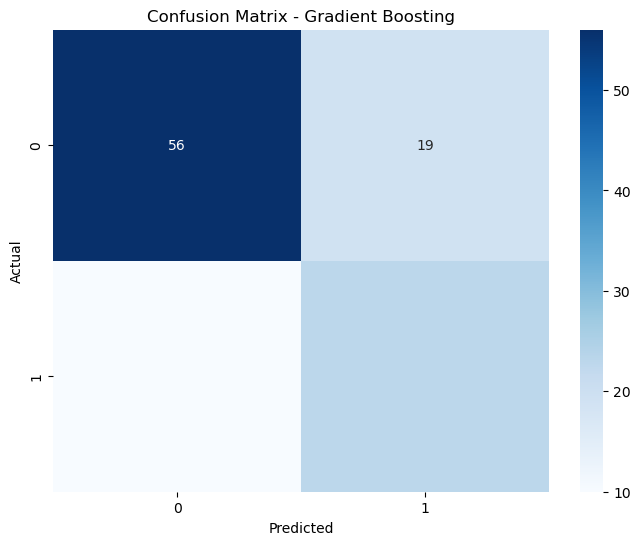

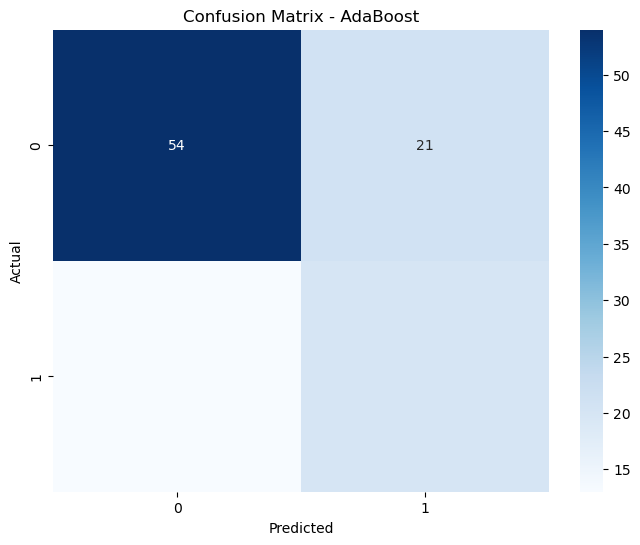

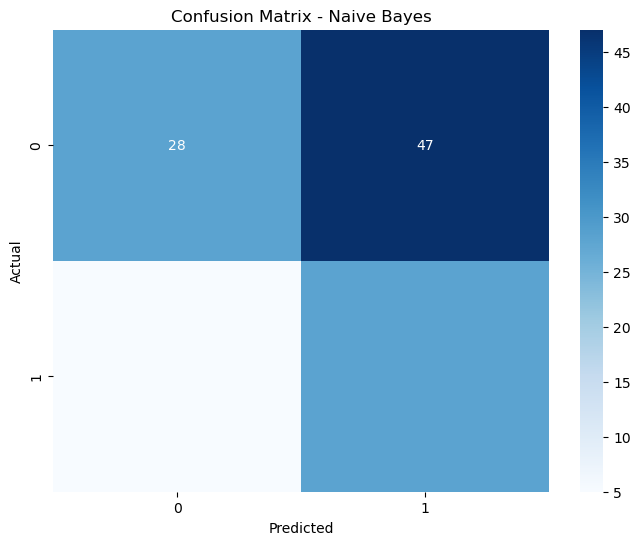

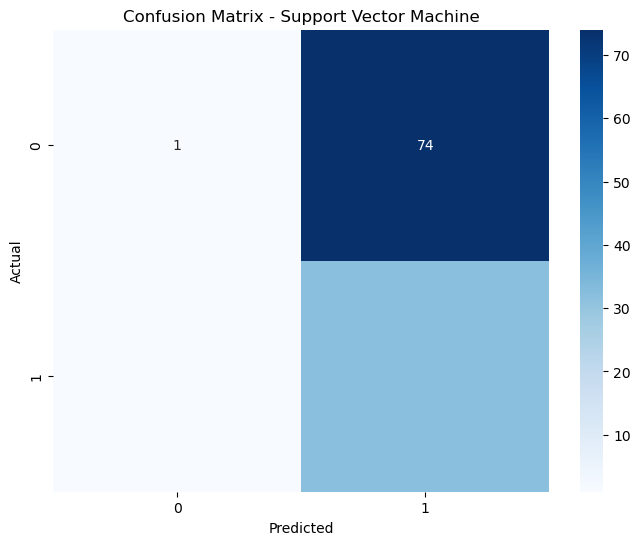

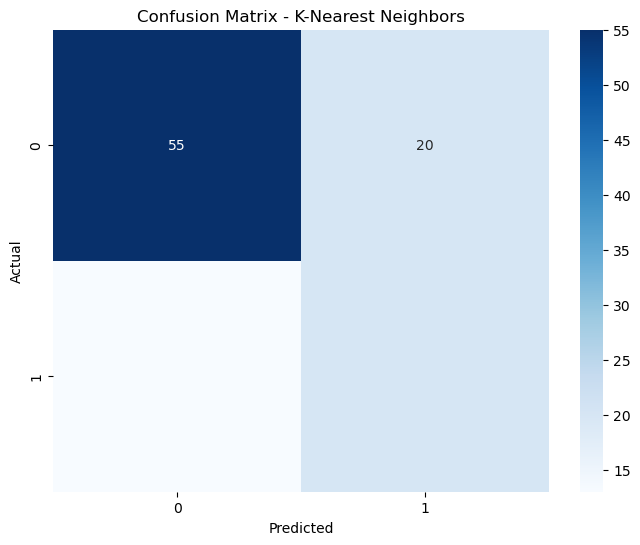

In [127]:
# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
     # Append the results to the list
    results.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [128]:
# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

               Classifier  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.703704   0.514286  0.545455  0.529412
1           Decision Tree  0.629630   0.405405  0.454545  0.428571
2           Random Forest  0.685185   0.487805  0.606061  0.540541
3       Gradient Boosting  0.731481   0.547619  0.696970  0.613333
4                AdaBoost  0.685185   0.487805  0.606061  0.540541
5             Naive Bayes  0.518519   0.373333  0.848485  0.518519
6  Support Vector Machine  0.305556   0.301887  0.969697  0.460432
7     K-Nearest Neighbors  0.694444   0.500000  0.606061  0.547945


In [129]:
# Check the balance of the classes after SMOTE
original_class_distribution = y_train.value_counts()
balanced_class_distribution = pd.Series(y_train_balanced).value_counts()


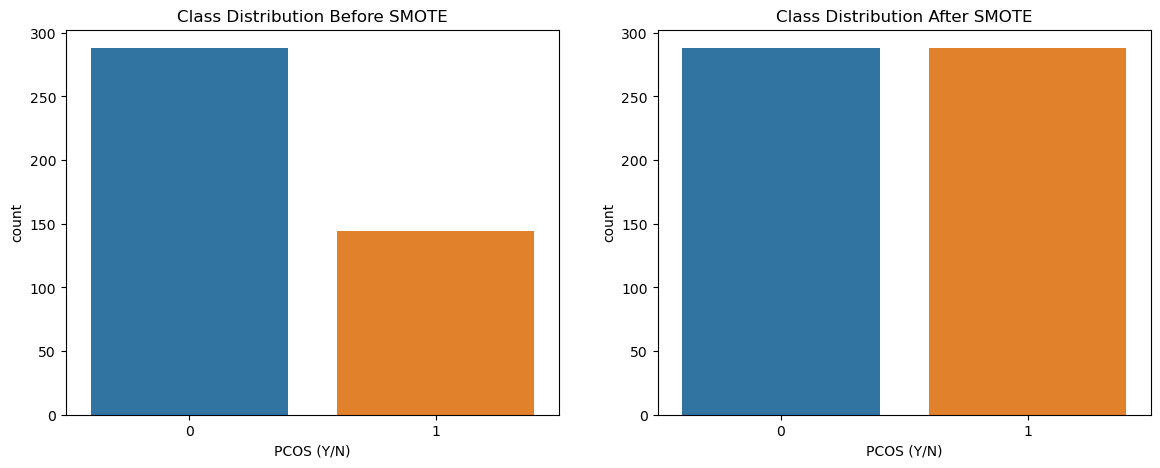

In [130]:
# Plotting the class distributions before and after SMOTE
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Class Distribution Before SMOTE')
sns.countplot(x=y_train_balanced, ax=axes[1])
axes[1].set_title('Class Distribution After SMOTE')
plt.show()

In [132]:
print("Class distribution in original training set:", original_class_distribution)
print("Class distribution in balanced training set:", balanced_class_distribution)

Class distribution in original training set: PCOS (Y/N)
0    288
1    144
Name: count, dtype: int64
Class distribution in balanced training set: PCOS (Y/N)
0    288
1    288
Name: count, dtype: int64
